<a href="https://colab.research.google.com/github/Muhammad-Salman-Hassan/DeepLearning/blob/main/spamClassifierWithNaiyveBayes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
from zipfile import ZipFile
file_name='/content/drive/MyDrive/smsspamcollection.zip'

with ZipFile(file_name,'r') as zip:
  zip.extractall()
  print("finish")
  

finish


In [6]:
path='/content/SMSSpamCollection'
import pandas as pd
df=pd.read_csv(path,sep='\t',names=['labels','message'])

In [7]:
df

,labels,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will ü b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [8]:
import nltk
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger') 

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


True

In [9]:
import re
from nltk import PorterStemmer,WordNetLemmatizer
import pandas as pd

from nltk.corpus import stopwords
from nltk import sent_tokenize,word_tokenize
import numpy as np


In [10]:
corpus=[]
wordnet=WordNetLemmatizer()
Ps=PorterStemmer()


In [11]:
for i in range(0,len(df)):
  reg=re.sub('[^a-zA-Z]',' ',df['message'][i])
  reg=reg.lower()
  reg=reg.split()
  
  word=[wordnet.lemmatize(word) for word in reg if word not in set(stopwords.words('english'))]
  finale=' '.join(word)
  corpus.append(finale)

In [12]:
corpus

['go jurong point crazy available bugis n great world la e buffet cine got amore wat',
 'ok lar joking wif u oni',
 'free entry wkly comp win fa cup final tkts st may text fa receive entry question std txt rate c apply',
 'u dun say early hor u c already say',
 'nah think go usf life around though',
 'freemsg hey darling week word back like fun still tb ok xxx std chgs send rcv',
 'even brother like speak treat like aid patent',
 'per request melle melle oru minnaminunginte nurungu vettam set callertune caller press copy friend callertune',
 'winner valued network customer selected receivea prize reward claim call claim code kl valid hour',
 'mobile month u r entitled update latest colour mobile camera free call mobile update co free',
 'gonna home soon want talk stuff anymore tonight k cried enough today',
 'six chance win cash pound txt csh send cost p day day tsandcs apply reply hl info',
 'urgent week free membership prize jackpot txt word claim c www dbuk net lccltd pobox ldnw rw'

In [13]:
from sklearn.feature_extraction.text import CountVectorizer
Count=CountVectorizer(max_features=4000)
X=Count.fit_transform(corpus).toarray()

In [14]:
X.shape

(5572, 4000)

In [15]:
Y=pd.get_dummies(df['labels'])
Y=Y.iloc[:,1]

In [16]:
Y

0       0
1       0
2       1
3       0
4       0
       ..
5567    1
5568    0
5569    0
5570    0
5571    0
Name: spam, Length: 5572, dtype: uint8

In [17]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.3,random_state=0)

In [18]:
from sklearn.naive_bayes import MultinomialNB
MNB=MultinomialNB()
MNB.fit(X_train,Y_train)


MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [19]:
y_pred=MNB.predict(X_test)

In [20]:
from sklearn.metrics import confusion_matrix
confusion_matrix(Y_test,y_pred)

array([[1438,   13],
       [  13,  208]])

In [21]:
import seaborn as sns

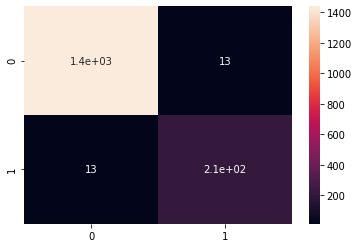

In [22]:
sns.heatmap(confusion_matrix(Y_test,y_pred),annot=True)

In [23]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

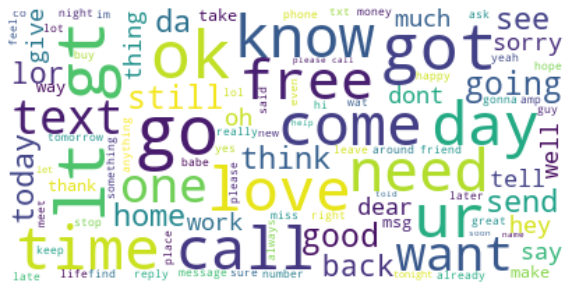

In [26]:
wordcloud = WordCloud(max_font_size=50, max_words=100, background_color="white").generate(txt)
plt.figure(figsize=(10,10))

plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

In [ ]:
process_message

In [25]:
txt=list(corpus)
txt=' '.join(corpus)

txt1=list(reg)
txt1=' '.join(reg)

In [38]:
def find(x):
    if x == 1:
        print ("Message is SPAM")
    else:
        print ("Message is NOT Spam")

text = ["Congratulation ! you got 1000 $ in your account contact us"]
integers = Count.transform(text)
x = MNB.predict(integers)[0]
find(x) 

Message is SPAM
